In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aisailib import GP, GM, skewgauss



## Initialize process and model


In [2]:

gp = GP()
gm = GM()



## Define time and inner cause curve


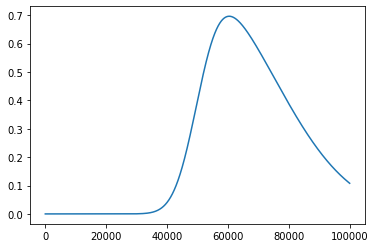

In [3]:

stime = 100000
t = np.arange(stime)
inner_cause = skewgauss(n=stime, relative_location=0.5, alpha=4)

plt.plot(inner_cause)


##   Loop through timesteps


In [4]:

da = 0
data = []
for t in range(stime):
    gm.mu_nui = inner_cause[t]
    gp.update(da)
    gp.generate()
    sp, ss = gp.sp, gp.ss
    da = gm.update((sp, ss))
    spg, ssg = gm.spg, gm.ssg
    os = gm.omega_s
    data.append((sp, ss, spg, ssg, os))

data = np.vstack(data)



## Plot sensory anticipation vs sensory perceptions


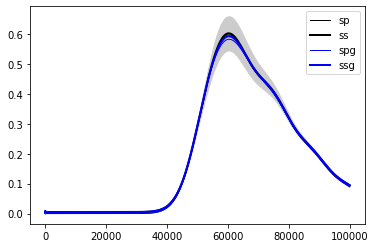

In [5]:


sp, ss, spg, ssg, os = data.T

t = np.arange(len(ss))
plt.fill_between(t, ss - os, ss + os, color=[0.8, 0.8, 0.8])
p1, = plt.plot(t, sp, c='black', lw=1)
p2, = plt.plot(t, ss, c='black', lw=2)
p3, = plt.plot(t, spg, c='blue', lw=1)
p4, = plt.plot(t, ssg, c='blue', lw=2)
plt.legend([p1, p2, p3, p4], ['sp', 'ss', 'spg', 'ssg'])